In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.neural_network import MLPRegressor

## Abrir Archivos

In [2]:
#cargamos los datos de entrada
data_train = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/train.csv",header=0)
data_wf1 = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1.csv",header=0)
data_bench = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/benchmark.csv",header=0)

#veamos cuantas dimensiones y registros contiene
#data_train.shape

# Ver los 1ros registros
data_train.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000


In [3]:
data_wf1.head()

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13


In [4]:
data_bench.head()

,id,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,1,2011010101,0.551,0.0,0.968,0.645,0.9,0.921,0.833
1,2,2011010102,0.551,0.0,0.968,0.645,0.9,0.921,0.833
2,3,2011010103,0.551,0.0,0.968,0.645,0.9,0.921,0.833
3,4,2011010104,0.551,0.0,0.968,0.645,0.9,0.921,0.833
4,5,2011010105,0.551,0.0,0.968,0.645,0.9,0.921,0.833


## Unir Archivo benchmarck

In [5]:
base_data = data_train.append(data_bench)
base_data

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7,id
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051,NaN
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051,NaN
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000,NaN
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000,NaN
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000,NaN
...,...,...,...,...,...,...,...,...,...
7483,2012062808,0.226,0.069,0.227,0.011,0.329,0.079,0.000,7484.0
7484,2012062809,0.226,0.069,0.227,0.011,0.329,0.079,0.000,7485.0
7485,2012062810,0.226,0.069,0.227,0.011,0.329,0.079,0.000,7486.0
7486,2012062811,0.226,0.069,0.227,0.011,0.329,0.079,0.000,7487.0


## Agregar campos auxiliares

In [6]:
# agregar anno
def anno(num):
    num_str = str(num)
    num_corto = num_str[0:4]
    return int(num_corto)

# agregar mes
def mes(num):
    num_str = str(num)
    num_corto = num_str[4:6]
    return int(num_corto)

# agregar mes
def dia(num):
    num_str = str(num)
    num_corto = num_str[6:8]
    return int(num_corto)

# agregar hrsObs
def horsObs(num):
    num_str = str(num)
    num_corto = num_str[8:10]
    return int(num_corto)

def upd_date(num):
    num_str = str(num)
    num_corto = num_str[0:8]
    return int(num_corto)


# Crear campos
data_wf1['anno'] = data_wf1['date'].apply(anno)
data_wf1['mes'] = data_wf1['date'].apply(mes)
data_wf1['dia'] = data_wf1['date'].apply(dia)
data_wf1['horsObs'] = data_wf1['date'].apply(horsObs)

# Actualizar date
data_wf1['date'] = data_wf1['date'].apply(upd_date)

data_wf1['daysAdd'] = -5
data_wf1['horsFore']= -5
data_wf1['dateFore']= -5
data_wf1['wp1']= -5

data_wf1

,date,hors,u,v,ws,wd,anno,mes,dia,horsObs,daysAdd,horsFore,dateFore,wp1
0,20090701,1,2.34,-0.79,2.47,108.68,2009,7,1,0,-5,-5,-5,-5
1,20090701,2,2.18,-0.99,2.40,114.31,2009,7,1,0,-5,-5,-5,-5
2,20090701,3,2.20,-1.21,2.51,118.71,2009,7,1,0,-5,-5,-5,-5
3,20090701,4,2.35,-1.40,2.73,120.86,2009,7,1,0,-5,-5,-5,-5
4,20090701,5,2.53,-1.47,2.93,120.13,2009,7,1,0,-5,-5,-5,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,20120626,44,2.44,1.08,2.67,66.14,2012,6,26,12,-5,-5,-5,-5
104828,20120626,45,2.11,1.46,2.57,55.39,2012,6,26,12,-5,-5,-5,-5
104829,20120626,46,1.63,1.61,2.29,45.42,2012,6,26,12,-5,-5,-5,-5
104830,20120626,47,1.07,1.58,1.91,34.05,2012,6,26,12,-5,-5,-5,-5


## Actualizar campos auxiliares

In [7]:
# daysAdd
def asigna_daysAdd(hors, horsObs):
    suma=0
    if horsObs == 0:
        if hors > 24:
           suma=1           
    else:
        if (hors > 12) & (hors <= 36):
          suma=1
        elif hors > 36: 
          suma=2
    return suma

data_wf1['daysAdd'] = data_wf1.apply(lambda x: asigna_daysAdd(x['hors'],x['horsObs']), axis=1);

In [8]:
# horsFore
def asigna_horsFore(hors, horsObs):
    hrs=hors
    if horsObs == 0:
        if hors > 24:
           hrs=hors-24         
    else:
        if (hors > 12) & (hors <= 36):
          hrs=hors-12 
        elif hors > 36: 
          hrs=hors-36
        
    if hrs==24:
        hrs=00
        
    return int(hrs)

data_wf1['horsFore'] = data_wf1.apply(lambda x: asigna_horsFore(x['hors'],x['horsObs']), axis=1);

In [9]:
#data_wf1.head(50)

In [12]:
# dateFore
from datetime import timedelta,datetime

# Convertir num 2 digitos con cero a la izquierda
def conv_num_2D(num):
  num_conv = "0" + str(num)
  num_final = num_conv[len(num_conv)-2:len(num_conv)]
  
  return num_final


# Asignar dateFore
def asigna_dateFore(anno, mes, dia,daysAdd, horsFore):
    fecha = str(int(anno)) +"-"+ str(int(mes)) +"-"+ str(int(dia))
    datetime_obj = datetime.strptime(fecha, '%Y-%m-%d')
    fecha_fin = datetime_obj + timedelta(days=daysAdd)
    #date_time = datetime.fromtimestamp(fecha_fin)
    fecha_format= fecha_fin.strftime("%Y%m%d")
    fecha_format = fecha_format + conv_num_2D(horsFore)
    
    return int(fecha_format)

data_wf1['dateFore'] = data_wf1.apply(lambda x: asigna_dateFore(x['anno'],x['mes'],x['dia'],x['daysAdd'],x['horsFore']), axis=1);
data_wf1

,date,hors,u,v,ws,wd,anno,mes,dia,horsObs,daysAdd,horsFore,dateFore,wp1
0,20090701,1,2.34,-0.79,2.47,108.68,2009,7,1,0,0,1,2009070101,-5
1,20090701,2,2.18,-0.99,2.40,114.31,2009,7,1,0,0,2,2009070102,-5
2,20090701,3,2.20,-1.21,2.51,118.71,2009,7,1,0,0,3,2009070103,-5
3,20090701,4,2.35,-1.40,2.73,120.86,2009,7,1,0,0,4,2009070104,-5
4,20090701,5,2.53,-1.47,2.93,120.13,2009,7,1,0,0,5,2009070105,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,20120626,44,2.44,1.08,2.67,66.14,2012,6,26,12,2,8,2012062808,-5
104828,20120626,45,2.11,1.46,2.57,55.39,2012,6,26,12,2,9,2012062809,-5
104829,20120626,46,1.63,1.61,2.29,45.42,2012,6,26,12,2,10,2012062810,-5
104830,20120626,47,1.07,1.58,1.91,34.05,2012,6,26,12,2,11,2012062811,-5


In [13]:
#temp_ = data_wf1[(data_wf1['date'] ==  20090701) & (data_wf1['horsObs'] ==  12)]
#temp_

In [14]:
# Asignar wp1
def asigna_wp1(dateFore):
    busq_wp1 = data_train['wp1'][ (data_train['date'] ==  dateFore)]
    #busq_wp1 = base_data['wp1'][ (base_data['date'] ==  dateFore)]
    
    
    #val_final= pd.NA
    val_final= None
    if len(busq_wp1)>0:
         val_final=busq_wp1.values[0]
    
    return val_final

data_wf1['wp1'] = data_wf1.apply(lambda x: asigna_wp1(x['dateFore']), axis=1);
#data_wf1

## Reemplazar wp1=0 por mean y borrar NA

In [47]:
#zero_rows = data_wf1[data_wf1['wp1']==0] 
#zero_rows

In [49]:
#nan_rows = data_wf1[data_wf1['ws'].isnull()] 
#nan_rows
data_wf1

,date,hors,u,v,ws,wd,anno,mes,dia,horsObs,daysAdd,horsFore,dateFore,wp1
0,20090701,1,2.34,-0.79,2.47,108.68,2009,7,1,0,0,1,2009070101,0.085
1,20090701,2,2.18,-0.99,2.40,114.31,2009,7,1,0,0,2,2009070102,0.020
2,20090701,3,2.20,-1.21,2.51,118.71,2009,7,1,0,0,3,2009070103,0.060
3,20090701,4,2.35,-1.40,2.73,120.86,2009,7,1,0,0,4,2009070104,0.045
4,20090701,5,2.53,-1.47,2.93,120.13,2009,7,1,0,0,5,2009070105,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,20120626,44,2.44,1.08,2.67,66.14,2012,6,26,12,2,8,2012062808,NaN
104828,20120626,45,2.11,1.46,2.57,55.39,2012,6,26,12,2,9,2012062809,NaN
104829,20120626,46,1.63,1.61,2.29,45.42,2012,6,26,12,2,10,2012062810,NaN
104830,20120626,47,1.07,1.58,1.91,34.05,2012,6,26,12,2,11,2012062811,NaN


In [64]:
output = data_wf1.apply(pd.Series.interpolate)
output

,date,hors,u,v,ws,wd,anno,mes,dia,horsObs,daysAdd,horsFore,dateFore,wp1
0,20090701,1,2.34,-0.79,2.47,108.68,2009,7,1,0,0,1,2009070101,0.085
1,20090701,2,2.18,-0.99,2.40,114.31,2009,7,1,0,0,2,2009070102,0.020
2,20090701,3,2.20,-1.21,2.51,118.71,2009,7,1,0,0,3,2009070103,0.060
3,20090701,4,2.35,-1.40,2.73,120.86,2009,7,1,0,0,4,2009070104,0.045
4,20090701,5,2.53,-1.47,2.93,120.13,2009,7,1,0,0,5,2009070105,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,20120626,44,2.44,1.08,2.67,66.14,2012,6,26,12,2,8,2012062808,0.226
104828,20120626,45,2.11,1.46,2.57,55.39,2012,6,26,12,2,9,2012062809,0.226
104829,20120626,46,1.63,1.61,2.29,45.42,2012,6,26,12,2,10,2012062810,0.226
104830,20120626,47,1.07,1.58,1.91,34.05,2012,6,26,12,2,11,2012062811,0.226


In [65]:
    # Completar Filas con NaN
    #frm_final = data_wf1.dropna() 

    #data_wf1['ws'].fillna((data_wf1['ws'].mean()), inplace=True)
    #data_wf1['wd'].fillna((data_wf1['wd'].mean()), inplace=True)
#data_wf1['wp1'].fillna((data_wf1['wp1'].mean()), inplace=True)
#frm_final = data_wf1.dropna() 
    #frm_final

    #frm_final = data_wf1
    #frm_final

    #X_clean=X.fillna(X.mean())
    #Y_clean=Y.fillna(Y.mean())

In [66]:
#nan_rows = data_wf1[data_wf1['wp1'].isnull()] 
#nan_rows
#output

## Eliminar pronosticos menor a 5 horas

In [67]:
#temp_ = output[(output['hors'] >=  5) & (output['horsObs']==0)]
temp_ = output[(output['hors'] >=  5) ]
output = temp_

output.head()
#frm_final.corr()

,date,hors,u,v,ws,wd,anno,mes,dia,horsObs,daysAdd,horsFore,dateFore,wp1
4,20090701,5,2.53,-1.47,2.93,120.13,2009,7,1,0,0,5,2009070105,0.035
5,20090701,6,2.66,-1.29,2.96,115.79,2009,7,1,0,0,6,2009070106,0.005
6,20090701,7,2.69,-0.81,2.81,106.71,2009,7,1,0,0,7,2009070107,0.000
7,20090701,8,2.72,-0.26,2.73,95.39,2009,7,1,0,0,8,2009070108,0.000
8,20090701,9,2.87,0.08,2.87,88.50,2009,7,1,0,0,9,2009070109,0.010


## Borrar campos auxiliares

In [68]:
output.drop(['date','u','v','daysAdd','horsFore','dateFore'], axis=1, inplace=True)
output

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.0350
5,6,2.96,115.79,2009,7,1,0,0.0050
6,7,2.81,106.71,2009,7,1,0,0.0000
7,8,2.73,95.39,2009,7,1,0,0.0000
8,9,2.87,88.50,2009,7,1,0,0.0100
...,...,...,...,...,...,...,...,...
104779,44,5.66,121.95,2012,6,26,0,0.3480
104780,45,5.20,120.47,2012,6,26,0,0.3376
104781,46,4.24,120.96,2012,6,26,0,0.3272
104782,47,3.13,122.81,2012,6,26,0,0.3168


In [69]:
#output

## Redondear 3 decimales en valor wp1

In [70]:
#temp_ = frm_final[(frm_final['wp1'] > 0)]
#frm_final = temp_


#def cambiar_cero(num):
#    if num == 0:
#        num_fin = frm_final['wp1'].mean()
#    else:
#        num_fin = num
#    return num_fin

# Redondear wp1
#frm_final['wp1'] = frm_final['wp1'].apply(cambiar_cero)

#frm_final.loc[frm_final.wp1 == 0, 'wp1'] = frm_final.wp1.mean()


In [71]:
#frm_final

In [72]:
#frm_final['wp1'].round(3)

def round_dec(num):    
    return round(num,3)

# Redondear wp1
output['wp1'] = output['wp1'].apply(round_dec)

#frm_final.loc['wp1'] = round(frm_final.wp1,3)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [37]:
output

,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.035
5,6,2.96,115.79,2009,7,1,0,0.005
6,7,2.81,106.71,2009,7,1,0,0.000
7,8,2.73,95.39,2009,7,1,0,0.000
8,9,2.87,88.50,2009,7,1,0,0.010
...,...,...,...,...,...,...,...,...
104827,44,2.67,66.14,2012,6,26,12,0.226
104828,45,2.57,55.39,2012,6,26,12,0.226
104829,46,2.29,45.42,2012,6,26,12,0.226
104830,47,1.91,34.05,2012,6,26,12,0.226


In [46]:
output.corr()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
hors,1.000000e+00,-0.009213,-0.002939,0.000000,-4.550212e-20,-1.495096e-17,0.000000e+00,0.013367
ws,-9.212510e-03,1.000000,-0.164146,-0.014030,-1.204947e-02,1.520077e-02,-3.033993e-02,0.568161
wd,-2.938547e-03,-0.164146,1.000000,-0.020134,-2.858808e-02,4.729461e-02,2.933036e-03,-0.169101
anno,0.000000e+00,-0.014030,-0.020134,1.000000,-4.555529e-01,-1.323925e-02,0.000000e+00,0.101105
mes,-4.550212e-20,-0.012049,-0.028588,-0.455553,1.000000e+00,1.091359e-02,3.655866e-19,-0.071964
dia,-1.495096e-17,0.015201,0.047295,-0.013239,1.091359e-02,1.000000e+00,1.891352e-18,0.003222
horsObs,0.000000e+00,-0.030340,0.002933,0.000000,3.655866e-19,1.891352e-18,1.000000e+00,-0.007128
wp1,1.336657e-02,0.568161,-0.169101,0.101105,-7.196366e-02,3.221901e-03,-7.127735e-03,1.000000


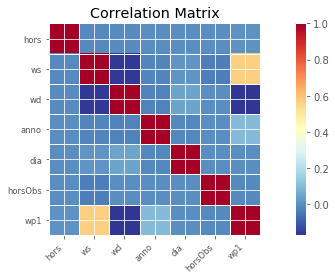

In [51]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10, 4)

corr = output.set_index("mes").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [44]:
result_df = output.drop_duplicates(subset=['hors', 'ws', 'wd','anno', 'mes', 'dia','wp1'])

In [45]:
result_df

,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.035
5,6,2.96,115.79,2009,7,1,0,0.005
6,7,2.81,106.71,2009,7,1,0,0.000
7,8,2.73,95.39,2009,7,1,0,0.000
8,9,2.87,88.50,2009,7,1,0,0.010
...,...,...,...,...,...,...,...,...
104827,44,2.67,66.14,2012,6,26,12,0.226
104828,45,2.57,55.39,2012,6,26,12,0.226
104829,46,2.29,45.42,2012,6,26,12,0.226
104830,47,1.91,34.05,2012,6,26,12,0.226


In [74]:
#output.drop(['hors','anno','mes','dia','horsObs'], axis=1, inplace=True)
#output

In [75]:
#output = output.drop_duplicates() 
#output

## Grabar datos finales

In [43]:

output.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train.csv')
